# Image Captioning using Saleforce's blip-image-captioning-large

In [3]:
from transformers.utils import logging
logging.set_verbosity_error()

import warnings
warnings.filterwarnings("ignore", message="Using the model-agnostic default `max_length`")
from transformers import BlipForConditionalGeneration
from transformers import AutoProcessor

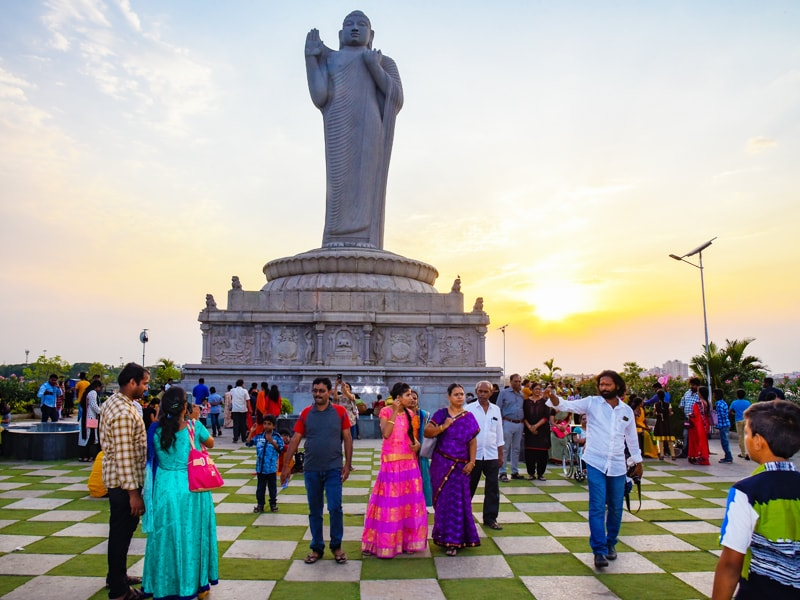

In [8]:
# Preparing Pipeline
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

# Preparing Input
from PIL import Image
image = Image.open("hussain.jpeg")
image

Conditioning Captioning

In [9]:
text = "a photograph of "
inputs = processor(image, text, return_tensors="pt")

# Inference
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

a photograph of the statue of unity at the maha maha park


Unconditioned Captioning

In [11]:
inputs = processor(image, return_tensors="pt")

# inference
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

people standing around the statue of unity at sunset


Fun fact : Above photo is of very famous hussian sagar in Hyderabad, India. But model falsely tags it as statue of unity. Nevertheless model can be retrained with these kind of images to get correct outputs.